### 이상치 데이터
* 이상치
    - IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현한다
    - 다른 데이터보다 아주 작거나 큰 값을 말한다
    - 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다.
* 이상치 처리
    1. 제거
        - 오타, 오류, 비상식적 값들은 단순히 제거한다
    2. 치환
        - 평균, 최빈값, 중앙값(중위수)
* 이상치 구하기
    - 1/4 분위값 25%, 2/4 분위값 중앙값(median), 3/4 분위값 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
    - 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)
---

<img src="../images/이상치.png">

In [1]:
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_25040\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../data_set/2.데이터 클린징/food.csv')
df.head()

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10


In [3]:
df.mean()

food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64

In [4]:
df.describe() #기초 통계값

,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


In [12]:
import numpy as np

test_median = []
for i in range(1, 11):
    test_median.append(i)
    
test_median.append(1000)

In [13]:
print('평균: ', np.mean(test_median))
print('중위수(중앙값): ', np.median(test_median))

평균:  95.9090909090909
중위수(중앙값):  6.0


In [14]:
a_m = np.median(df['food_a'])
b_m = np.median(df['food_b'])
c_m = np.median(df['food_c'])

print('a: ', a_m)
print('b: ', b_m)
print('c: ', c_m)

a:  46.0
b:  30.0
c:  31.0


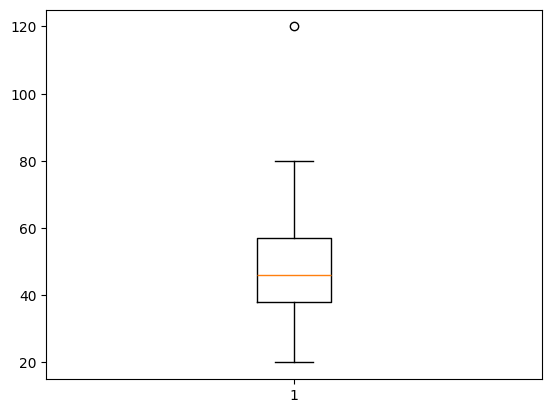

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df['food_a'])
plt.show()

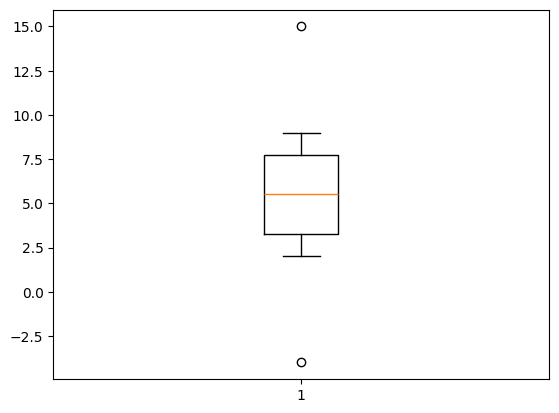

In [69]:
test_median = [-4, 2, 3, 4, 5, 6, 7, 8, 9, 15]
df_test = pd.DataFrame(test_median)
plt.boxplot(df_test[0])
plt.show()

In [70]:
df_test.describe()

,0
count,10.000000
mean,5.500000
std,4.972145
min,-4.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,15.000000


- IQR = Q3(3사분위) - Q1(1사분위)
- 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
- 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)

In [71]:
q1 = df_test.describe().loc['25%']
q3 = df_test.describe().loc['75%']
q1, q3

(0    3.25
 Name: 25%, dtype: float64,
 0    7.75
 Name: 75%, dtype: float64)

In [72]:
iqr = q3 - q1
# 3.0을 적용해도 괜찮음 (데이터에 따라서 적용할 수치가 다름)
lower = q1 - iqr * 1.5 # 최저 이상치
upper = q3 + iqr * 1.5 # 최대 이상치
iqr, lower, upper

(0    4.5
 dtype: float64,
 0   -3.5
 dtype: float64,
 0    14.5
 dtype: float64)

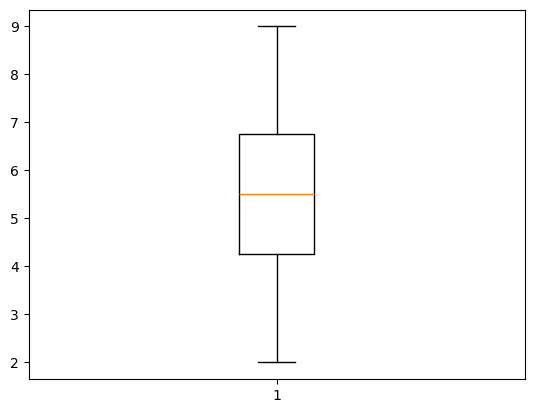

In [73]:
df_test = df_test[(df_test >= lower) & (df_test <= upper)]
df_test.replace(to_replace=np.nan, value=df_test.describe().loc['50%'], inplace=True)
plt.boxplot(df_test)
plt.show()

# df_test.dropna()